# Forest learning model for of the network

Here we want to find out that "is there any rule to be admitted in a community in the netwok?"
If community nodes have same criteria in a certain network it can be seen by tree splitting branches.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
import Analysis_Tools_Homans
import os
import sys

Version definition and path finder to begin evaluation

In [3]:
N = 100
T = 5000
version = 'p2_p1_p0_num_of_tries_accept_util_off'

OSNAME = {'win32':'\\', 'linux':'/'}
if sys.platform.startswith('win32'):
    plat = 'win32'
elif sys.platform.startswith('linux'):
    plat = 'linux'
current_path = os.getcwd()
path = current_path +OSNAME[plat]+'runned_files'+OSNAME[plat]+'N%d_T%d'%(N,T)+OSNAME[plat]+version+OSNAME[plat]

memory_size = 10
saving_time = T
path += '0_%d'%(T)+OSNAME[plat]

Load the data

In [4]:
dataframe = pd.read_csv(path + 'all_agents_properties.csv')
dataframe

,money,asset,approval,worth_ratio,situation,others_feeling,degree,community,self_value,value_to_others
0,0.934,4.656206,4.081,1.096393,0.858312,-0.003191,18.0,0.0,3.217685,3.302480
1,4.990,14.080997,12.048,1.325267,0.771595,-0.009714,18.0,3.0,7.065746,8.792647
2,8.012,10.241558,3.187,1.429431,0.653006,0.007335,17.0,2.0,9.226825,10.597873
3,2.844,20.247779,15.504,0.890841,0.917824,0.010127,11.0,3.0,5.293688,5.536478
4,11.592,11.853548,0.441,1.686114,0.411099,-0.002996,12.0,3.0,10.010199,9.982828
...,...,...,...,...,...,...,...,...,...,...
95,0.444,5.246447,5.480,1.141085,0.724101,0.002809,26.0,0.0,3.919850,3.958042
96,2.619,12.192630,9.629,1.005784,0.100403,0.021851,32.0,3.0,6.881862,6.335620
97,3.838,9.120213,5.974,1.130965,0.199761,0.015572,19.0,0.0,8.736935,8.041338
98,7.241,9.422968,2.573,1.179211,0.103907,0.027827,24.0,1.0,11.229824,11.137769


In [5]:
dataframe['community'].unique()

array([ 0.,  3.,  2., -1.,  1.])

In [6]:
dataframe = dataframe[ dataframe['community'] != -1 ]

(array([31.,  0.,  0., 19.,  0.,  0., 17.,  0.,  0., 30.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

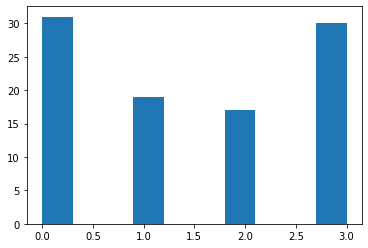

In [7]:
plt.hist(dataframe['community'])

In [8]:
X,y = dataframe.drop(['community'],axis = 1), dataframe['community']

Tree model to classify

In [9]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
importances_tm = pd.Series(tree_model.feature_importances_,
                          index = X.columns)
sorted_importances_tm = importances_tm.sort_values()

Text(0.5, 1.0, 'Feature Importance')

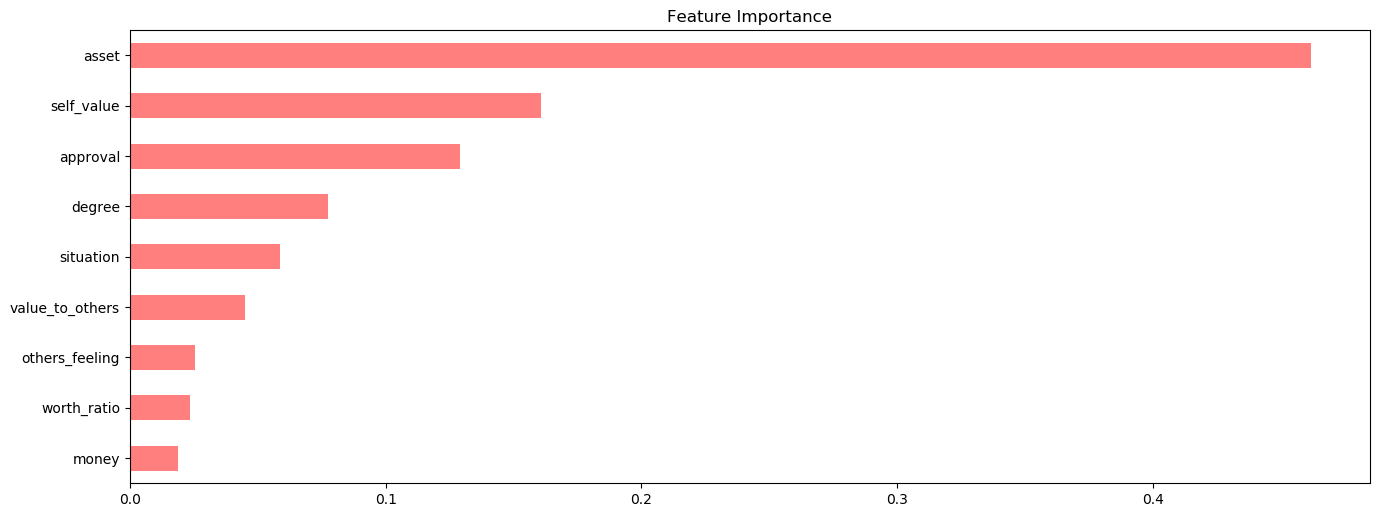

In [11]:
plt.figure(figsize = (16,6),dpi = 100)
sorted_importances_tm.plot(kind = 'barh',
                        color = 'red',alpha = 0.5)
plt.title("Feature Importance")

In [12]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
              filled=True, rounded=True,
              special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


InvocationException: GraphViz's executables not found

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X,y)

In [ ]:
importances_rf = pd.Series(tree_model.feature_importances_,
                          index = X.columns)
sorted_importances_rf = importances_rf.sort_values()

In [ ]:
plt.figure(figsize = (16,6),dpi = 100)
sorted_importances_rf.plot(kind = 'barh',
                        color = 'red',alpha = 0.5)
plt.title("Feature Importance")